# Breast Cancer Prediction 

## Introduction 

### Description of dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

3-32)Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Objective
**We will be using this dataset to predict whether a particular tumor is malignant or benign . Therefore, this is a prediction problem** 

In [1]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##reading data
data=pd.read_csv("C:/Users/Parth Mehta/Downloads/ibm machine learning/Supervised Learning - Classification/data.csv")

## Initial exploration of data

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### Summary of initial exploration of data
The data has 569 examples and 33 features .
It has missing values in one column - **Unnamed: 32**
By just looking at the data we can clearly see that **id** and **Unnamed: 32** are useless columns which we will drop.
The second column i.e **diagnosis** is what we're trying to predict.We can also infer that every column in the dataframe which we are not trying to predict is a continuous numerical feature.We can see that 37.25 percent of the tumors are malignant and 62.74 percent of the tumors are benign. Therefore, we will be using a stratified shuffle split for the data. This kind of shuffling helps us maintain the proportion of each class in the train and test split.

In [9]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis

### Checking correlation of features with the target variable

<AxesSubplot:>

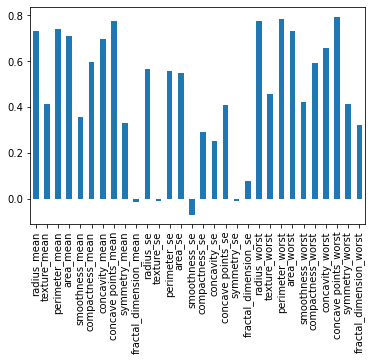

In [11]:
fields=data.drop(['diagnosis'],axis=1)
y = (data['diagnosis'] == 'M').astype(int)
correlations = fields.corrwith(y)
correlations.plot(kind='bar')



Features like **smoothness_se , fractal_dimension_mean , texture_se , symmetry_se , fractal_dimension_se** will be dropped without question as they contribute so little to the outcome. 

In [12]:
drop_list=correlations[correlations<0.2].index

In [13]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
data['diagnosis'] = lb.fit_transform(data['diagnosis'])

In [36]:
data['diagnosis']

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
data.drop(drop_list,axis=1,inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking correlation of features amongst themselves

In [15]:
predictors=data.columns[1:]

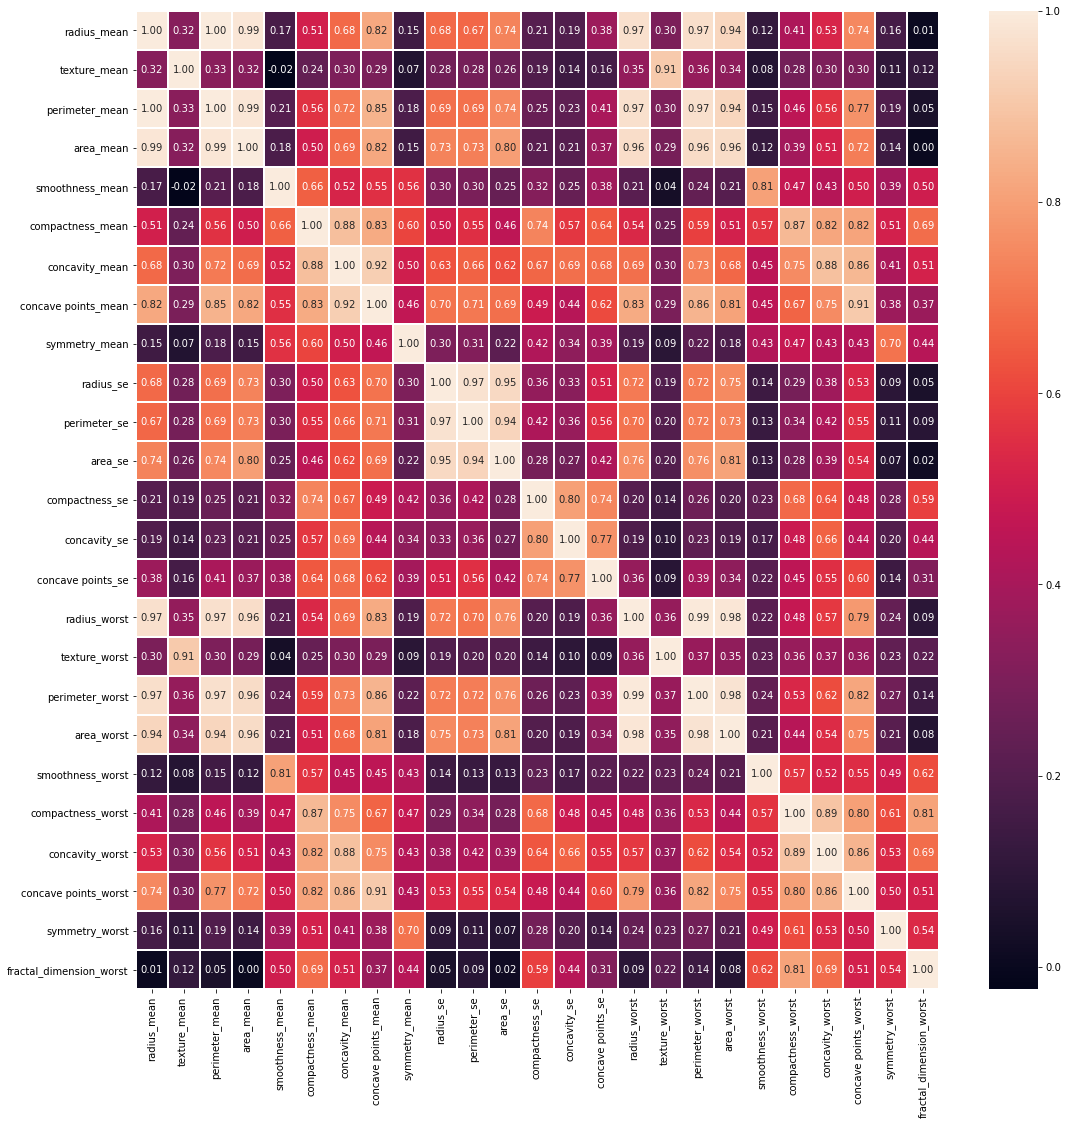

In [16]:
plt.figure(figsize=(18,18))
sns.heatmap(data[predictors].corr(),linewidths = 1, annot = True, fmt = ".2f")
plt.show()

**It can be seen that many of the features are highly correlated with each other**
1) radius_mean,perimeter_mean_area_mean,radius_worst,perimeter_worst,area_worst are highly correlated with each other.

2) radius_se,perimeter_se and area_se are highly correlated with each other.

3) texture_mean and texture_worst are highly correlated

4) compactness,concavity,concave_points mean and worst values are also correlated with each other without any pattern which is w    quite confusing !

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave points_se'}>],
       [<AxesSubplot:title={'center':'radius_worst'}>,
        <AxesSubplot:title={'center':'texture_worst'}>,
        <AxesSubplot:title={'center':'perimeter

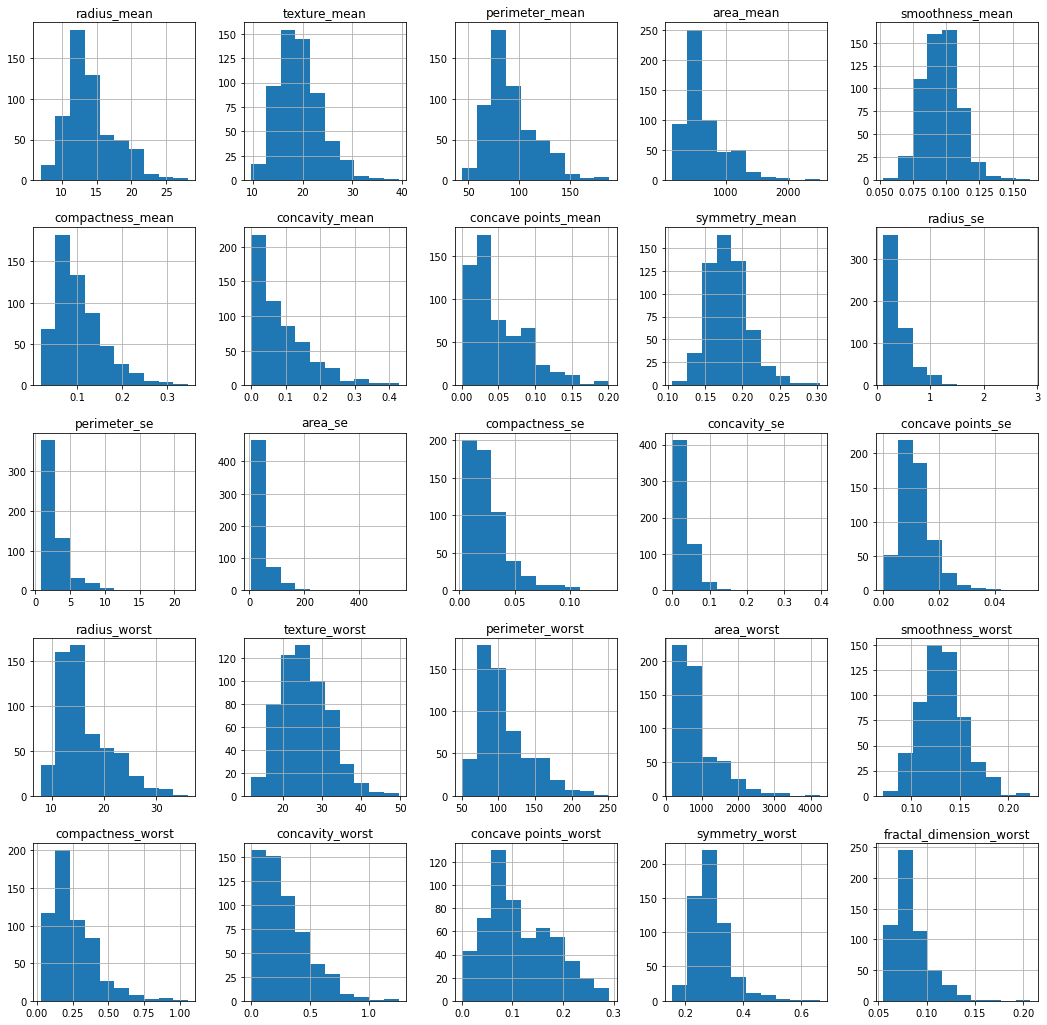

In [17]:
data[predictors].hist(figsize=(18,18))

**We can see that most of the features are right skewed . Therefore, it would be better if we scaled the features.**

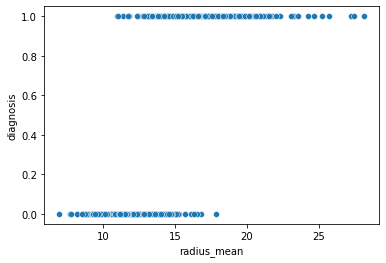

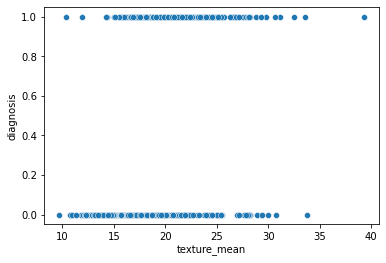

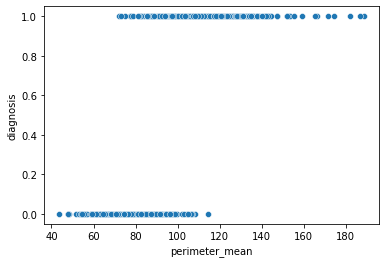

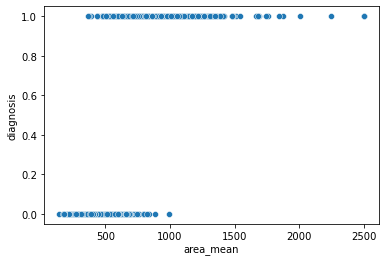

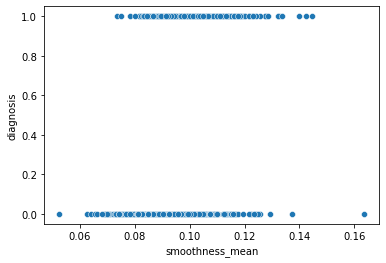

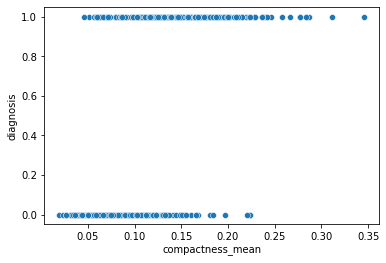

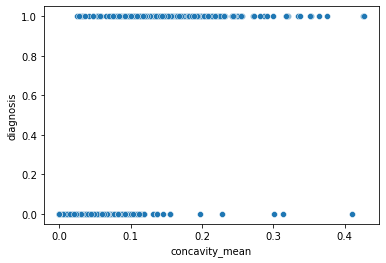

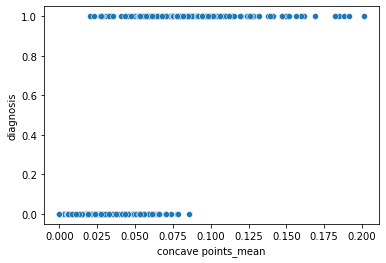

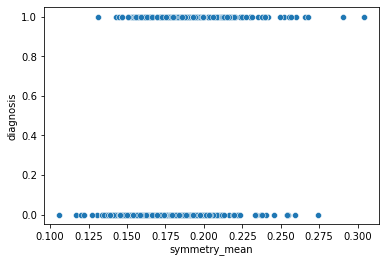

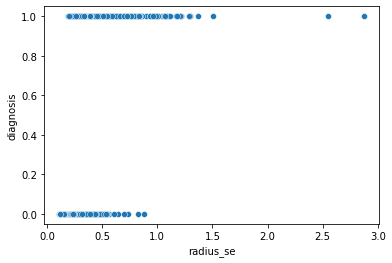

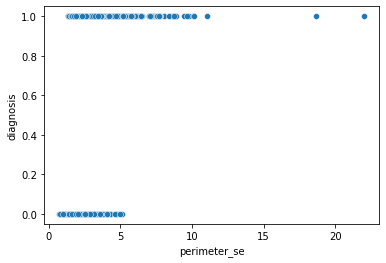

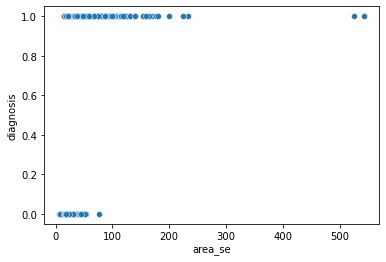

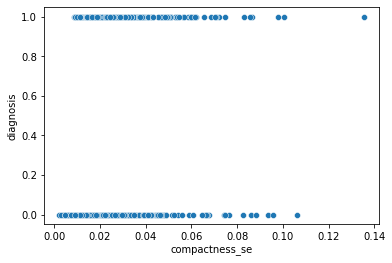

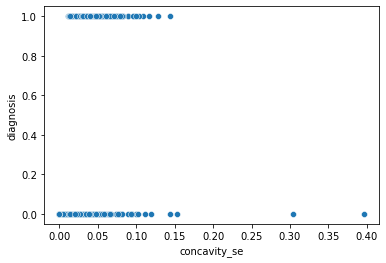

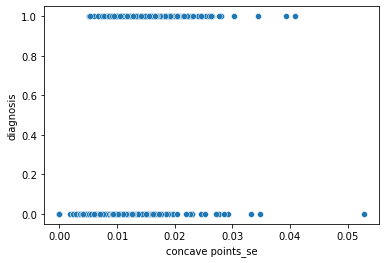

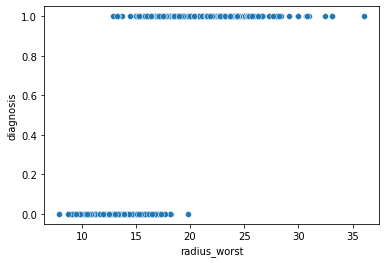

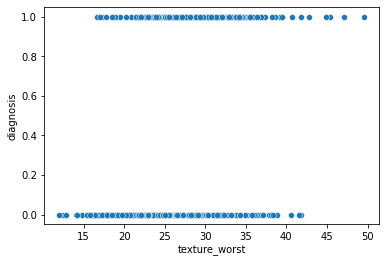

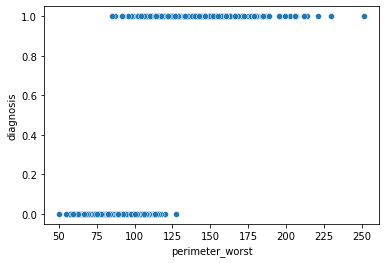

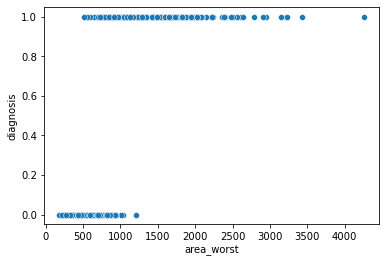

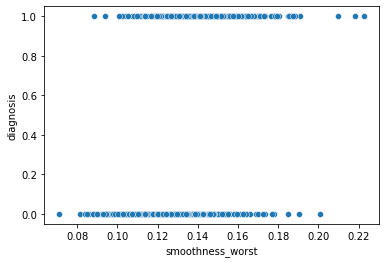

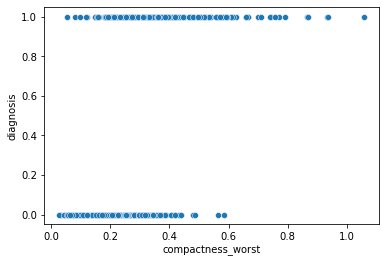

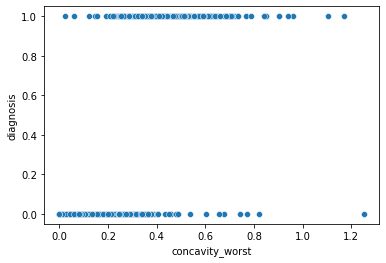

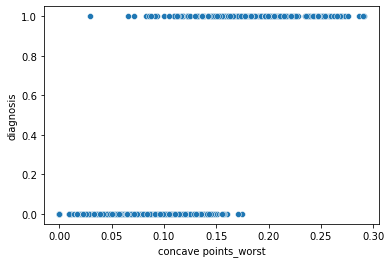

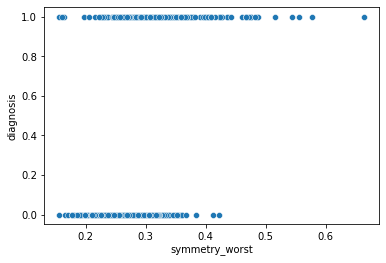

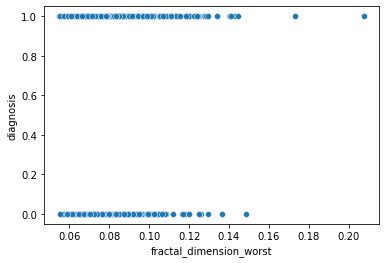

In [18]:
for col in predictors:
    sns.scatterplot(x=data[col],y=data['diagnosis'])
    plt.show()

**These scatter plots show that-**

***tumors with high radius, area, perimeter and concave points are usually malignant***

## Preparing the dataset for fitting 

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[predictors], data['diagnosis']))

# Create the data sets
X_train = data.loc[train_idx, predictors]
y_train = data.loc[train_idx, 'diagnosis']

X_test = data.loc[test_idx, predictors]
y_test = data.loc[test_idx, 'diagnosis']

In [20]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [23]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**Logistic Regression gives an accuracy of 98%**

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**KNN also gives an accuracy of 98%**

## Support Vector Machine

In [27]:
from sklearn.svm import SVC
SVC_Gaussian = SVC(kernel='rbf', gamma=0.1,C=10)
SVC_Gaussian.fit(X_train,y_train)
y_pred = SVC_Gaussian.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**Support vector machines give an accuracy of 98%**

## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       107
           1       0.89      0.80      0.84        64

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



**Decision Tree gives an accuracy of just 89%**

**Using GridSearchCV because we can't let our decision tree classfier be behind**

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [30]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(29, 5)

In [31]:
y_test_pred_gr = GR.predict(X_test)

In [32]:
print(classification_report(y_test, y_test_pred_gr))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       107
           1       0.93      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



**Okay We got it upto 91%**

## Feature importances

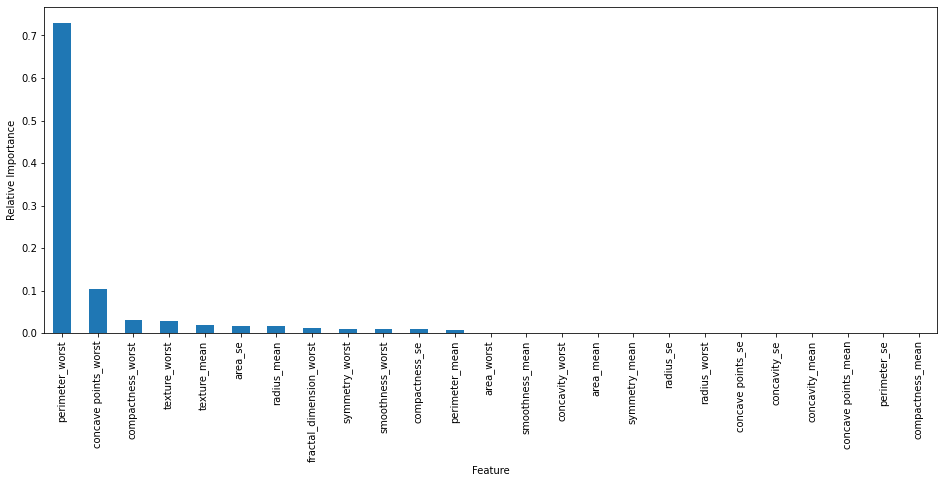

In [33]:
feature_imp = pd.Series(dt.feature_importances_,index=data.columns[1:]).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

This shows that only - 

**perimeter_worst,concave_points_worst,compactness_worst,texture_worst,texture_mean,area_se,
radius_mean,fractal_dimension_worst,symmetry_worst,smoothness_worst,compactness_se,perimeter_mean**

could have been used as they are the only important features

## Random Trees Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]}

GR = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)
GR = GR.fit(X_train, y_train)
y_test_pred_gr = GR.predict(X_test)
print(GR.best_estimator_)
print("")
print(classification_report(y_test, y_test_pred_gr))
rf=RandomForestClassifier(n_estimators=400).fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Random Forest Classifier gives an accuracy of 97%**

## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200, 300, 400,500],
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

y_test_pred_gr = GV_GBC.predict(X_test)
print(GV_GBC.best_estimator_)
print("")
print(classification_report(y_test, y_test_pred_gr))

GradientBoostingClassifier(max_features=3, random_state=42)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**Gradient Boosting also resulted in an accuracy of 98%**

## Conclusions
1) Since this is a medical problem our main objective is to accuractly predict the malignant tumors i.e the label 1 . Therefore, the main aim should be to decrease the number of false negatives and have the highest possible recall as possible. This can be achieved by any of the 98% classifiers . However, I would reccomend using the gradient boosted algorithm as it has the highest recall for both the classes. 

2) Only some of the features are really important out of the 33 features with which we started . We can clearly see grid seach showing the maximum number of features used were 3 and the feature importances showed by the decision tree.



## Suggestions

1) My suggestion would be to try feature selection in the early stages and use only those features that have a high relative   importance and then train the model. Maybe that will increase the accuracy even more .

2) After that stacking classifier can be used which eg. using a voting classifier with logistic regression and gradient boosting which should increase the accuracy even more.
